In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, accuracy_score


# Завдання 1

## Побудова регресійної моделі та запобігання перенавчання

### Завантаження та підготовка даних: Виберіть вбудований датасет для задачі регресії з бібліотеки scikit-learn (наприклад, Boston Housing, California Housing) або будь-який датасет для регресії.

In [2]:
california = fetch_california_housing()
x = california.data
y = california.target

## Завантажте дані та розділіть їх на навчальну та тестову вибірки

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Побудова регресійної моделі: Побудуйте базову лінійну регресійну модель на основі навчальної вибірки



In [4]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## Оцініть точність моделі на тестовій вибірці та визначте її продуктивність, використовуючи метрики якості регресії

In [5]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [6]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [8]:
print(f"Навчальна вибірка MSE = {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"Тестова вибірка MSE = {test_mse:.2f}, R^2 = {test_r2:.2f}")

Навчальна вибірка MSE = 0.52, R^2 = 0.61
Тестова вибірка MSE = 0.56, R^2 = 0.58


### Степінь перенавчання моделі на навчальній та тестовій вибірці незначна, що свідчить про хороші результати

## Запобігання перенавчанню: Введіть регуляризацію: використайте моделі з регуляризацією, такі як Ridge Regression або Lasso Regression. Перевірте роботу моделі з різними значеннями параметра регуляризації та виберіть оптимальне значення.



In [10]:
alphas = np.logspace(0, 4, 100)


In [11]:
ridge_cv_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_train, y_train)
    scores = cross_val_score(ridge_model, x, y, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(-scores.mean())

In [12]:
lasso_cv_scores = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(x_train, y_train)
    scores = cross_val_score(lasso_model, x, y, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(-scores.mean())

In [13]:
best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Best alpha value for Ridge: {best_ridge_alpha}")
print(f"Best alpha value for Lasso: {best_lasso_alpha}")

Best alpha value for Ridge: 72.20809018385468
Best alpha value for Lasso: 1.0


## Застосуйте крос-валідацію для більш стабільної оцінки продуктивності моделі.



In [15]:
def cross_validate(model, X, y, cv=5):
    mse_scores = cross_val_score(model, x, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, x, y, cv=cv, scoring='r2')
    
    print(f"{model.__class__.__name__} Результат Крос-валідації")
    print(f"Mean MSE: {-np.mean(mse_scores):.4f} (+/- {np.std(mse_scores) * 2:.4f})")
    print(f"Mean R^2: {np.mean(r2_scores):.4f} (+/- {np.std(r2_scores) * 2:.4f})")
    print()
    
ridge_model = Ridge(alpha=best_ridge_alpha)
cross_validate(ridge_model, x, y)

lasso_model = Lasso(alpha=best_lasso_alpha)
cross_validate(lasso_model, x, y)

linear_model = LinearRegression()
cross_validate(linear_model, x, y)

Ridge Результат Крос-валідації
Mean MSE: 0.5579 (+/- 0.1359)
Mean R^2: 0.5534 (+/- 0.1256)

Lasso Результат Крос-валідації
Mean MSE: 1.0023 (+/- 0.2228)
Mean R^2: 0.2035 (+/- 0.1038)

LinearRegression Результат Крос-валідації
Mean MSE: 0.5583 (+/- 0.1312)
Mean R^2: 0.5530 (+/- 0.1234)



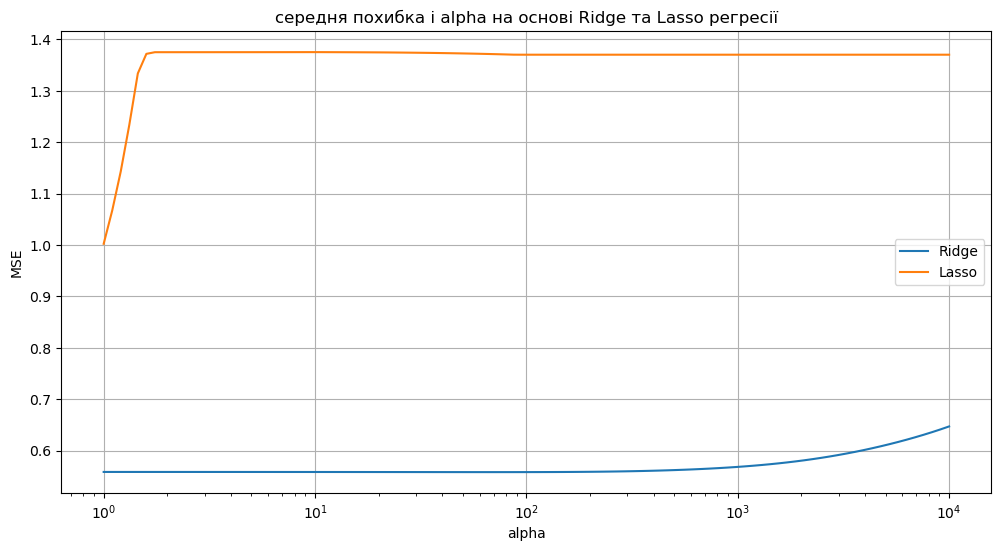

In [17]:
plt.figure(figsize=(12, 6))
plt.semilogx(alphas, ridge_cv_scores, label='Ridge')
plt.semilogx(alphas, lasso_cv_scores, label='Lasso')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('середня похибка і alpha на основі Ridge та Lasso регресії')
plt.legend()
plt.grid(True)
plt.show()

## Висновки
### Лінійна регресія має аналогічні показники з Ridge, що свідчить про відсутність перенавчання.
### Ridge покращує результати порівняно з базовою моделлю.
### Lasso дає гірші результати, ніж Ridge та лінійна регресія. Очевидно, що дані містять колінеарність.
### Ridge регресія краще підходить для даних, ніж Lasso, оскільки в них є колінеарність


# Завдання 2

## Виконати кластерізацію даних. Затосувати метод ліктя або метод силуетів.

In [18]:
wcss_2dim = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(x_train)
    wcss_2dim.append(kmeans.inertia_)

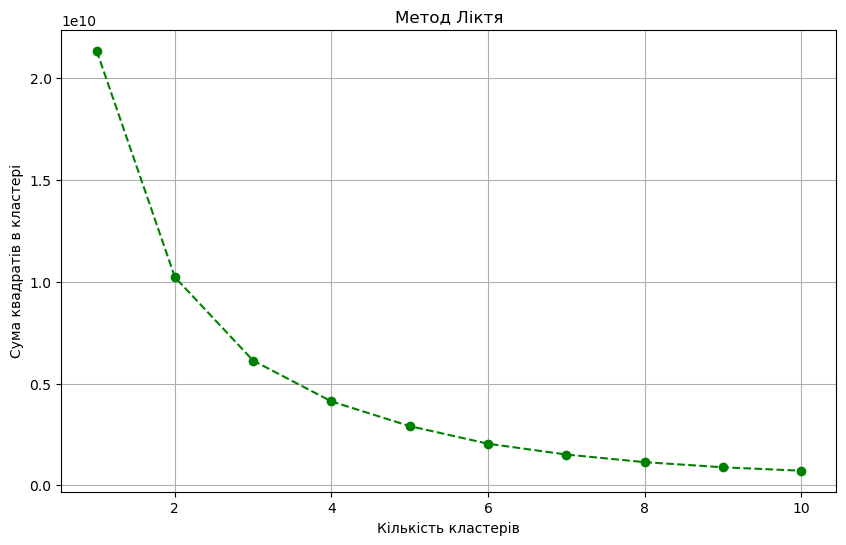

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss_2dim, marker='o', linestyle='--', color='green')
plt.title('Метод Ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів в кластері')
plt.grid(True)
plt.show()

### Оптимальна кількість кластерів = 2 за методом Ліктя

## Метод Силуетів

In [20]:
silhouette_q = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(x_train)
    silhouette_avg = silhouette_score(x_train, cluster_labels)
    silhouette_q.append(silhouette_avg)

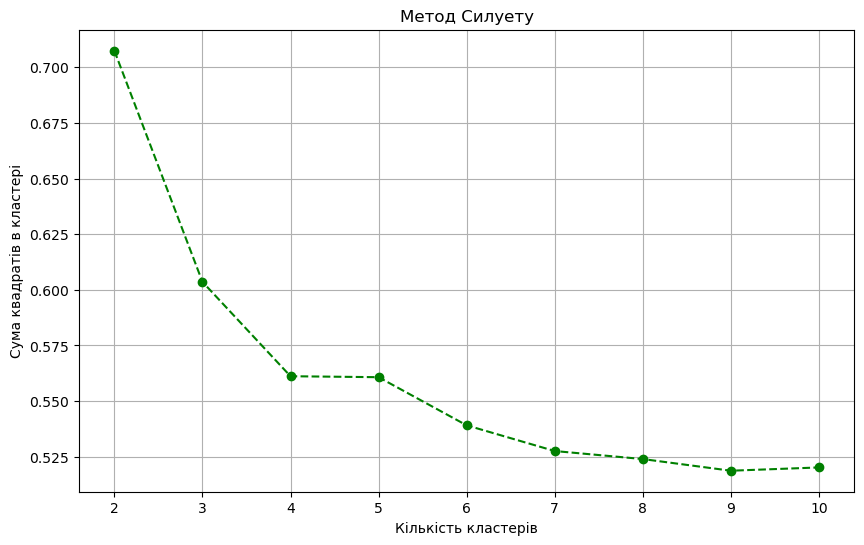

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_q, marker='o', linestyle='--', color='green')
plt.title('Метод Силуету')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів в кластері')
plt.grid(True)
plt.show()

## За методом Силуету оптимальна кількість кластерів = 2

## Візуалізація кластерів

In [22]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(x_train)


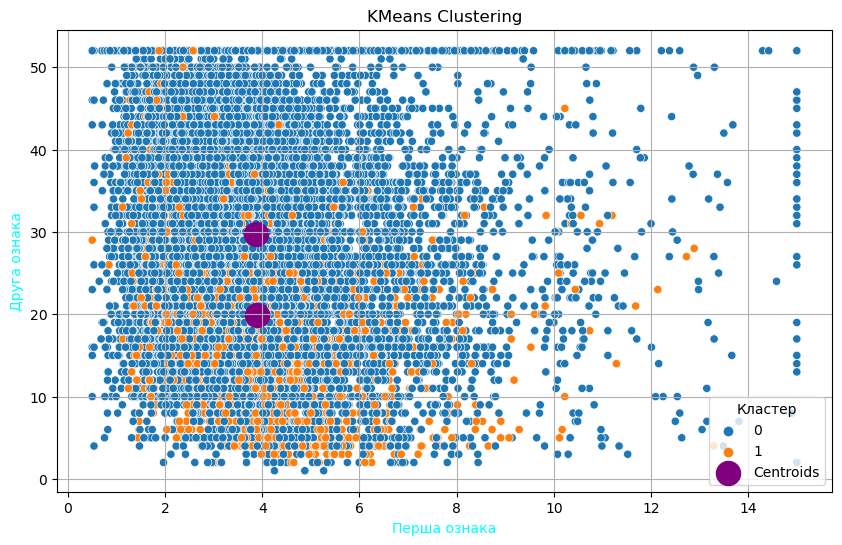

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=clusters, palette='tab10', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='purple', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Перша ознака', color='cyan')
plt.ylabel('Друга ознака', color='cyan')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

## Висновки
## Кількість кластерів k, очевидно, підібрана вірно, оскільки точки чітко розподілені між кластерами.
##  Оптимальна кількість кластерів k=2, то на графіку ми бачимо саме два добре відокремлених кластери з центроїдами у найщільніших зонах на візуалізації.